<img style="float: left;" src="pic2.png">

### Sridhar Palle, Ph.D, spalle@emory.edu (Applied ML & DS with Python Program)

***

## Project Solution - Predicting Home Prices

<img src="home2.JPG" alt="Drawing" style="float: left; width: 150px;"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
sklearn.__version__

'0.20.1'

## 1. Data Collection

In [3]:
from sklearn import datasets # To work on built-in data sets in sklearn, first we need to import datasets module

In [4]:
[dset for dset in dir(datasets) if 'load_' in dset] # These are some datasets available to play with.

['load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine']

### E.1 Load the boston dataset & explore

In [5]:
boston = datasets.load_boston() # Load diabetes() dataset. 

**Look at the boston keys()**

In [6]:
# Your code

In [7]:
boston.keys() # This data set is stored as dictionary module. So, lets see the keys for this.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

**Get the shape of 'data' in the above keys**

In [8]:
# Your code

In [9]:
boston['data'].shape # Lets see the shape of 'data' from the above boston dictionary

(506, 13)

**Get the feature names from boston dictionary**

In [10]:
#Your code

In [11]:
boston['feature_names'] # Lets look at the feature names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

**Look at the 'DESCR' key (hint: use print)**

In [12]:
# Your Code

In [13]:
print(boston['DESCR']) # Look at the description (hint: use print)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### E.2 Convert the boston data into a data frame

**Create a dataframe X by using boston['data'], assign boston['feature_names'] as column names**

**print first 3 rows of X data frame**

In [14]:
# Your code

In [15]:
X = pd.DataFrame(boston['data'], columns=list(boston['feature_names']))
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


**Add an extra column 'MEDV' to X with values from boston['target']**

**print first 3 rows of X data frame**

In [16]:
# Your code

In [17]:
X['MEDV'] = boston['target'] # add the 'MEDV' house price column to the dataframe
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


## 2. Data Exploration & Visualization

### E3. Check to see how many missing values are present in each column of the X data Frame

In [18]:
#Your code

In [19]:
X.isnull().sum(0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### E4. Get some basic info on the dataset

In [20]:
# Your code

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


### E5. Get number of unique values for each column

In [22]:
# Your code

In [23]:
X.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

### E.6 Create a correlation matrix for all variables

In [24]:
#Your code  (Hint: use .corr() method on the data frame)

In [25]:
corm = X.corr() # Hint: use df.corr()
corm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### E.7 List all sorted correlation values from the above corm matrix, for MEDV

In [26]:
#Your Code

In [27]:
corm.loc['MEDV',:].sort_values() # hint use sort_values() for sorting the series values

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

## 3. Data Clean-Up

### E8. Remove 'CHAS' column from the X dataframe Hint: use df.drop()

Show first 2 rows

In [28]:
#Your code

In [29]:
X = X.drop('CHAS',1)
X.head(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


## 4. Train/Test Split

### E9. Make a new data frame Xf from independent variables in X dataframe

**Show first few rows and shape**

In [31]:
#Your code

In [34]:
Xf = X.loc[:, X.columns != 'MEDV']
print (Xf.head(3), '\n')
print (Xf.shape)

      CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03   

(506, 12)


### E10. Make a series yf with 'MEDV' values in X dataframe

In [35]:
#Your code

In [36]:
yf = X['MEDV']
yf.head(3)

0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64

### E.11 Perform the train/test split

In [37]:
from sklearn.model_selection import train_test_split

# Use test_size = 0.2, random_state = 10
# default split is 0.25, but can be changed through test_size = argument.

# Your code

**Print the shapes of X_train, y_train, X_test, y_test**

In [38]:
#Your code

In [39]:
X_train, X_test, y_train, y_test = train_test_split(Xf,yf, test_size=0.2, random_state=10)  
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


## 5. Apply a Machine Learning Model on the data

### E.12 Train the data

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

# Your code

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Get the model coefficients**

In [61]:
# Your code

In [62]:
lr.coef_

array([-1.31744766e-01,  6.32306951e-02,  4.19407621e-03, -1.59668633e+01,
        3.14216788e+00,  1.86999666e-02, -1.48432785e+00,  3.18573273e-01,
       -1.29376598e-02, -8.49712726e-01,  1.19329212e-02, -5.90123644e-01])

**Get the model intercept**

In [63]:
#Your code

In [64]:
lr.intercept_

36.68379224519953

**Convert model coefficients into a series. Assign 'X_train' column names as indices to this series**

In [65]:
#Your code

In [66]:
coef = pd.Series(lr.coef_, index=X_train.columns)
coef

CRIM       -0.131745
ZN          0.063231
INDUS       0.004194
NOX       -15.966863
RM          3.142168
AGE         0.018700
DIS        -1.484328
RAD         0.318573
TAX        -0.012938
PTRATIO    -0.849713
B           0.011933
LSTAT      -0.590124
dtype: float64

### E.13 Make predictions on train data

**Make predictions, assign them to a variable ypred_train, and show first five preidctions**

In [67]:
#Your code

In [68]:
ypred_train = lr.predict(X_train)
ypred_train[0:5]

array([21.12852656, 12.23605717, 13.71959835, 20.77905963, 23.57433787])

### E.14 Calculate the scores on train data

**Get the R2 score,Adjusted R2 score and mean squared error on training data**

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

# r2_train = #Your code
# ar2_train = # Your code
# mse_train = # Your code

#uncomment the lines below

# print ('R2score on train data is: ', r2_train)
# print ('Adjusted R2score on train data is: ', ar2_train)
# print ('Mean Squared Error on train data is: ', mse_train)

In [75]:
r2_train = r2_score(y_train, ypred_train)
ar2_train = 1 - ((1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
mse_train = mean_squared_error(y_train, ypred_train)

print ('R2score on train data is: ', r2_train)
print ('Adjusted R2score on train data is: ', ar2_train)
print ('Mean Squared Error on train data is: ', mse_train)

R2score on train data is:  0.7472127052625716
Adjusted R2score on train data is:  0.7394545274189677
Mean Squared Error on train data is:  19.454724849786786


### E.15 Make Predictions on Test Data

**Make predictions, assign them to a variable ypred_test, and show first five preidctions**

In [76]:
# Your code

In [77]:
ypred_test = lr.predict(X_test)
ypred_test[0:5]

array([31.25610443, 31.76458111, 30.89453623, 22.18428952, 19.27711399])

### E.16 Calculate R2 score on Test Data

In [80]:
# r2_test = #Your code
# mse_test = #Your code

#uncomment the lines below

# print ('R2score on test data is: ', r2_test)
# print ('Mean Squared Error on test data is: ', mse_test)

In [82]:
r2_test = r2_score(y_test, ypred_test)
mse_test = mean_squared_error(y_test, ypred_test)

print ('R2score on test data is: ', r2_test)
print ('Mean Squared Error on test data is: ', mse_test)

R2score on test data is:  0.6597971161753526
Mean Squared Error on test data is:  35.578670355500044


### E.17 Plot test set data predictions vs actual values

In [84]:
#Your code

#uncomment the lines below

# plt.xlabel('Y_true')
# plt.ylabel('Y_predictions')

# x = np.linspace(0,50,100)
# plt.plot(x,x)
# plt.show()

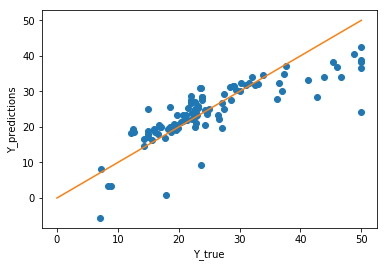

In [85]:
plt.plot(y_test,ypred_test, 'o')

plt.xlabel('Y_true')
plt.ylabel('Y_predictions')

x = np.linspace(0,50,100)
plt.plot(x,x)
plt.show()

## 6. Polynomial Features

### E.18 Train using Polynomial Features

**Get Polynomial Features (degree=2), assign them to X_train_poly, X_test_poly**

In [86]:
from sklearn.preprocessing import PolynomialFeatures

# poly = #Your Code
# X_train_poly= #Your code
# X_test_poly= #Your code

In [87]:
poly = PolynomialFeatures(2)
X_train_poly= poly.fit_transform(X_train)
X_test_poly= poly.fit_transform(X_test)

**Train LinearRegression on 'X_train_poly' polynomial features**

In [90]:
lr_poly = LinearRegression()

#Your code

In [91]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## E.19 Make Predictions

**On training data (print first 5 values)**

In [92]:
#Your code

In [93]:
ypred_train_poly = lr_poly.predict(X_train_poly)
ypred_train_poly[0:5]

array([20.90977563, 22.06893429, 13.84787516, 20.17316589, 18.38980621])

**On Test Data (print first 5 values)**

In [94]:
#Your code

In [95]:
ypred_test_poly = lr_poly.predict(X_test_poly)
ypred_test_poly[0:5]

array([27.79940167, 32.42403482, 29.00269494, 27.59234598, 14.59409407])

### E.20 Get Scores

**On training data**

In [96]:
# r2_train_poly = #Your code
# mse_train_poly = #Your code

# print ('R2 score on training data is: ', r2_train_poly)
# print ('Mean Squared Error on train data is: ', mse_train_poly)

In [97]:
r2_train_poly = r2_score(y_train,ypred_train_poly)
mse_train_poly = mean_squared_error(y_train, ypred_train_poly)

print ('R2 score on training data is: ', r2_train_poly)
print ('Mean Squared Error on train data is: ', mse_train_poly)

R2 score on training data is:  0.9217030990210623
Mean Squared Error on train data is:  6.025795982818036


**On Test Data**

In [98]:
# r2_test_poly = #Your code
# mse_test_poly = #Your code

# print ('R2 score on test data is: ', r2_test_poly)
# print ('Mean Squared Error on train data is: ', mse_test_poly)

In [99]:
r2_test_poly = r2_score(y_test,ypred_test_poly)
mse_test_poly = mean_squared_error(y_test, ypred_test_poly)
print ('R2 score on test data is: ', r2_test_poly)
print ('Mean Squared Error on train data is: ', mse_test_poly)

R2 score on test data is:  0.8575034384497972
Mean Squared Error on train data is:  14.902396279509679
